In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# για τα nan values
import numpy as np

# για τα γραφήματα
import matplotlib.pyplot as plt

# για την επεξεργασία ελληνικών κειμένων
import spacy

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m spacy download el_core_news_sm

2023-07-04 18:21:52.629904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 25.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
start_page = 3
end_page = 29

start_url = 'https://www.newsit.gr/category/politikh/page/'

test_url = start_url + str(start_page)

In [ ]:
# κατεβάζουμε τη δοκιμαστική σελίδα
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
teaser_articles_list = doc.find('div', {'class': 'content-area grid-parent mobile-grid-100 grid-75 tablet-grid-75'}).find_all('article')

In [ ]:
print(teaser_articles_list[0].prettify())

<article class="">
 <div class="image">
  <a href="https://www.newsit.gr/politikh/sto-ypourgeio-ygeias-o-kyriakos-mitsotakis-syzitiseis-me-xrysoxoidi-gia-tous-neous-genikous-grammateis/3810688/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/07/mitsotakis-xrysoxoidis-768x527.jpg');" title="Στο υπουργείο Υγείας την Τρίτη ο Κυριάκος Μητσοτάκης – Συζητήσεις με Χρυσοχοΐδη για τους  νέους γενικούς γραμματείς">
  </a>
 </div>
 <div>
  <div class="entry-meta mb-05">
   <span class="posted-on">
    <time class="entry-date published" datetime="2023-07-03T15:20:41+03:00">
     <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
      <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
      </path>
      <path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3

In [ ]:
if teaser_articles_list:
    first_article = teaser_articles_list[0]
    # Perform actions on the first article
    # extract the article title and URL
    title = first_article.find('a').text
    article_url = first_article.find('a')['href']
    print("Title:", title)
    print("URL:", article_url)
else:
    print("No teaser articles found.")


Title: 
URL: https://www.newsit.gr/politikh/sto-ypourgeio-ygeias-o-kyriakos-mitsotakis-syzitiseis-me-xrysoxoidi-gia-tous-neous-genikous-grammateis/3810688/


In [ ]:
if teaser_articles_list:
    first_teaser_article = teaser_articles_list[0]
    link_element = first_teaser_article.find('a', href=True)

    if link_element:
        link = link_element['href']
        print(link)
    else:
        print("Link element not found in the first teaser article.")
else:
    print("No teaser articles found.")


https://www.newsit.gr/politikh/sto-ypourgeio-ygeias-o-kyriakos-mitsotakis-syzitiseis-me-xrysoxoidi-gia-tous-neous-genikous-grammateis/3810688/


In [ ]:
main_url = 'https://www.newsit.gr'
article_link = main_url + link
print(article_link)

https://www.newsit.grhttps://www.newsit.gr/politikh/sto-ypourgeio-ygeias-o-kyriakos-mitsotakis-syzitiseis-me-xrysoxoidi-gia-tous-neous-genikous-grammateis/3810688/


In [ ]:
teasers_list = []

for page_num in range(start_page, end_page+1):
    page_url = start_url + str(page_num)
    response = requests.get(page_url)
    doc = BeautifulSoup(response.text, 'html.parser')

    teaser_articles_list = doc.find_all('article')

    for teaser in teaser_articles_list:
        story_dict = {}
        try:
            link = teaser.find('a')['href']
            if link.startswith("http"):
                story_dict['url'] = link
            else:
                story_dict['url'] = main_url + link
        except:
            story_dict['url'] = ''
        teasers_list.append(story_dict)

    time.sleep(1)

In [ ]:
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df
print(newsit_teasers_df)

                                                   url
0    https://www.newsit.gr/politikh/sto-ypourgeio-y...
1    https://www.newsit.gr/politikh/syriza-na-fygou...
2    https://www.newsit.gr/politikh/apotheothike-ap...
3    https://www.newsit.gr/politikh/kyvernisi-gia-s...
4    https://www.newsit.gr/politikh/nd-o-stayros-ka...
..                                                 ...
535  https://www.newsit.gr/politikh/ekloges-2023-ky...
536  https://www.newsit.gr/politikh/ekloges-2023-ko...
537  https://www.newsit.gr/politikh/mitsotakis-gia-...
538  https://www.newsit.gr/politikh/ekloges-2023-po...
539  https://www.newsit.gr/politikh/zoi-konstantopo...

[540 rows x 1 columns]


In [ ]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/newsit_teasers.csv', index=False)

In [ ]:
article_url = 'https://www.newsit.gr/politikh/apotelesmata-eklogon-2023-o-nikos-androulakis-epelekse-na-kratisei-tin-edra-tis-a-thessalonikis/3809368/'

In [ ]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
article = doc.find('div', {'class': 'content-area'}).find('main', {'class': 'site-main'})
print(article.prettify())

<main class="site-main" id="main">
 <div class="breadcrumbs-container">
  <div class="grid-container grid-parent">
   <p id="breadcrumbs">
    <span>
     <span>
      <a href="https://www.newsit.gr/">
       <span class="home">
        NewsIT
       </span>
      </a>
      <span>
       <a href="https://www.newsit.gr/category/politikh/">
        Πολιτικη
       </a>
       <span aria-current="page" class="breadcrumb_last">
        Ο Νικος Ανδρουλακης επελεξε να κρατησει την εδρα της Α' Θεσσαλονικης - Εκτος Βουλης ο Χαρης Καστανιδης
       </span>
      </span>
     </span>
    </span>
   </p>
  </div>
 </div>
 <article class="post-3809368 post type-post status-publish format-standard has-post-thumbnail category-politikh tag-edra tag-ekloges-2023 tag-nikos-androulakis tag-pasok" id="post-3809368" itemscope="" itemtype="https://schema.org/CreativeWork">
  <div class="inside-article">
   <header class="entry-header">
    <div class="entry-meta">
     <span class="posted-on">
      <time

In [ ]:
title = article.find('h1').text
title

'Αποτελέσματα εκλογών 2023: Ο Νίκος Ανδρουλάκης επέλεξε να κρατήσει την έδρα της Α’ Θεσσαλονίκης'

In [ ]:
date = article.find('time')['datetime']
date

'2023-07-01T12:39:42+03:00'

In [ ]:
author = doc.find('div', {'class': 'author-name'}).text.strip() #δεν έχει όνομα συντάκτη στα θέματα πολιτικής στις σελίδες που επέλεξα

AttributeError: ignored

In [ ]:
paragraphs = article.find_all('p')
paragraphs

[<p id="breadcrumbs"><span><span><a href="https://www.newsit.gr/"><span class="home">NewsIT</span></a> <span><a href="https://www.newsit.gr/category/politikh/">Πολιτικη</a> <span aria-current="page" class="breadcrumb_last">Ο Νικος Ανδρουλακης επελεξε να κρατησει την εδρα της Α' Θεσσαλονικης - Εκτος Βουλης ο Χαρης Καστανιδης</span></span></span></span></p>,
 <p>Ο <a href="https://www.newsit.gr/tags/nikos-androulakis/" rel="noopener" target="_blank">Νίκος Ανδρουλάκης</a> επέλεξε να κρατήσει την έδρα της Α’ Θεσσαλονίκης, αφήνοντας εκτός Βουλής τον <a href="https://www.newsit.gr/tags/xaris-kastanidis/" rel="noopener" target="_blank">Χάρη Καστανίδη</a>, σύμφωνα με την ανακοίνωση της Χαριλάου Τρικούπη. </p>,
 <p>Όπως αναφέρει η ίδια ανακοίνωση, ο πρόεδρος του ΠΑΣΟΚ – ΚΙΝΑΛ θα προτείνει εκ νεόυ τον Οδυσσέα Κωνσταντινόπουλο για Ε΄ Αντιπρόεδρο της Βουλής και τον Μανώλη Χριστοδουλάκη για Γραμματέα του Προεδρείου της Βουλής.</p>,
 <p class="advert-badge align-center"></p>,
 <p>Ο πρόεδρος του ΠΑΣΟ

In [ ]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = article.find_all('p')     # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

"NewsIT Πολιτικη Ο Νικος Ανδρουλακης επελεξε να κρατησει την εδρα της Α' Θεσσαλονικης - Εκτος Βουλης ο Χαρης Καστανιδης Ο Νίκος Ανδρουλάκης επέλεξε να κρατήσει την έδρα της Α’ Θεσσαλονίκης, αφήνοντας εκτός Βουλής τον Χάρη Καστανίδη, σύμφωνα με την ανακοίνωση της Χαριλάου Τρικούπη.\xa0 Όπως αναφέρει η ίδια ανακοίνωση, ο πρόεδρος του ΠΑΣΟΚ – ΚΙΝΑΛ θα προτείνει εκ νεόυ τον Οδυσσέα Κωνσταντινόπουλο για Ε΄ Αντιπρόεδρο της Βουλής και τον Μανώλη Χριστοδουλάκη για Γραμματέα του Προεδρείου της Βουλής.  Ο πρόεδρος του ΠΑΣΟΚ είχε κατέβει σε τρεις περιφέρειες, όπως έχει δικαίωμα κάθε πολιτικός αρχηγός: Την Α’΄Θεσσαλονίκης, το Ηράκλειο της Κρήτης και το νότιο τομέα Αθηνών. Εάν επέλεγε το Νότιο Τομέα, θα έμενε εκτός ο Παύλος Χρηστίδης, εάν διάλεγε το Ηράκλειο θα κόβονταν ο Φραγκίσκος Παρασύρης. Υπενθυμίζεται ότι στις εκλογές του Μαΐου ο κ. Ανδρουλάκης είχε επιλέξει να κρατήσει την Α’ Θεσσσαλονίκης, αφήνοντας εκτός τον Χάρη Καστανίδη, ο οποίος είχε έρθει πρώτος σε σταυρούς. Η κίνηση εξόργισε τον κ. Κ

In [ ]:
newsit_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newsit_teasers.csv')
newsit_teasers_df.head()

url
0  https://www.newsit.gr/politikh/sto-ypourgeio-y...
1  https://www.newsit.gr/politikh/syriza-na-fygou...
2  https://www.newsit.gr/politikh/apotheothike-ap...
3  https://www.newsit.gr/politikh/kyvernisi-gia-s...
4  https://www.newsit.gr/politikh/nd-o-stayros-ka...

In [ ]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'content-area'}).find('main', {'class': 'site-main'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsit.gr"

  # url
  full_article_dict['url'] = article_url


  #title
  try:
    title = title = article.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = article.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = article.find('div', {'class': "author-name"}).span.text
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = 'newsit.gr'
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [ ]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

site                                                url  \
0    newsit.gr  https://www.newsit.gr/politikh/vitsas-gia-itta...   
1    newsit.gr  https://www.newsit.gr/politikh/proedros-tis-vo...   
2    newsit.gr  https://www.newsit.gr/politikh/syskepsi-mitsot...   
3    newsit.gr  https://www.newsit.gr/politikh/eklogi-proedrou...   
4    newsit.gr  https://www.newsit.gr/politikh/syriza-epikoino...   
..         ...                                                ...   
555  newsit.gr  https://www.newsit.gr/politikh/ekloges-2023-ky...   
556  newsit.gr  https://www.newsit.gr/politikh/ekloges-2023-ko...   
557  newsit.gr  https://www.newsit.gr/politikh/mitsotakis-gia-...   
558  newsit.gr  https://www.newsit.gr/politikh/ekloges-2023-po...   
559  newsit.gr  https://www.newsit.gr/politikh/zoi-konstantopo...   

                                                 title  \
0    Βίτσας για ήττα ΣΥΡΙΖΑ: «Δεν πήραμε χαμπάρι τι...   
1    Πρόεδρος της Βουλής ο Κωνσταντίνος Τασούλας με...   
2    Σύσκεψη Μητσοτάκη – Χρυσοχοΐδη: Σήμερα η ΠΝΠ γ...   
3    Εκλογή Προέδρου Βουλής: Η Πλεύση Ελευθερίας θα...   
4    ΣΥΡΙΖΑ: Επικοινωνία Τασούλα με Γεροβασίλη και ...   
..                                                 ...   
555  Εκλογές 2023 – Κυριάκος Μητσοτάκης: Επισκέφτηκ...   
556  Εκλογές 2023 – Κουτσούμπας: Η Ζωή Κωνσταντοπού...   
557  Μητσοτάκης για Ομπάμα: «Οι αξίες που μοιραζόμα...   
558  Εκλογές 2023: «Πόλεμος» ΣΥΡΙΖΑ – ΠΑΣΟΚ μετά απ...   
559  Ζωή Κωνσταντοπούλου: Debate θέλουν οι αποχωρήσ...   

                          date     author  \
0    2023-07-04T12:04:41+03:00  newsit.gr   
1    2023-07-04T11:58:35+03:00  newsit.gr   
2    2023-07-04T11:43:42+03:00  newsit.gr   
3    2023-07-04T11:38:51+03:00  newsit.gr   
4    2023-07-04T11:38:03+03:00  newsit.gr   
..                         ...        ...   
555  2023-06-22T14:22:39+03:00  newsit.gr   
556  2023-06-22T13:09:46+03:00  newsit.gr   
557  2023-06-22T12:22:54+03:00  newsit.gr   
558  2023-06-22T12:14:13+03:00  newsit.gr   
559  2023-06-22T11:00:14+03:00  newsit.gr   

                                             full_text  
0    NewsIT Πολιτικη Βιτσας για ηττα ΣΥΡΙΖΑ: «Δεν π...  
1    NewsIT Πολιτικη Προεδρος της Βουλης ο Κωνσταντ...  
2    NewsIT Πολιτικη Συσκεψη Μητσοτακη – Χρυσοχοιδη...  
3    NewsIT Πολιτικη «Παρων» θα ψηφισει η Πλευση Ελ...  
4    NewsIT Πολιτικη Επικοινωνια Τασουλα με Γεροβασ...  
..                                                 ...  
555  NewsIT Πολιτικη Επισκεψη Μητσοτακη στο Παλαιο ...  
556  NewsIT Πολιτικη Κουτσουμπας: Η Ζωη Κωνσταντοπο...  
557  NewsIT Πολιτικη Συναντηση Μητσοτακη με Ομπαμα:...  
558  NewsIT Πολιτικη «Πολεμος» ΣΥΡΙΖΑ - ΠΑΣΟΚ μετα ...  
559  NewsIT Πολιτικη Debate με την Ζωη Κωνσταντοπου...  

[560 rows x 6 columns]

In [ ]:
newsit_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/newsit_full_articles.csv', index=False)

In [ ]:
newsit_full_articles_df.loc[0, 'full_text']

'NewsIT Πολιτικη Βιτσας για ηττα ΣΥΡΙΖΑ: «Δεν πηραμε χαμπαρι τι γινεται στην κοινωνια» Μετά τις χθεσινές δηλώσεις του ότι η «απουσία επαφής με την κοινωνία και η έλλειψη συλλογικότητας», ήταν οι κύριες αιτίες που οδήγησαν στην πανωλεθρία του ΣΥΡΙΖΑ στις εκλογές, ο Δημήτρης Βίτσας επανήλθε την Τρίτη (04.07.23), τονίζοντας πως «δεν πήραμε χαμπάρι τι γίνεται στην κοινωνία. Συγκεκριμένα, ο Δημήτρης Βίτσας μιλώντας στον ραδιοφωνικό σταθμό της Θεσσαλονίκης, Status 107,7 είπε χαρακτηριστικά ότι εκ του αποτελέσματος έχει φανεί ότι «δεν είχαμε πάρει χαμπάρι τι γινόταν στην κοινωνία».  «Μπορεί να λοιδορούσαμε τα 100 και τα 150 και τα 50 ευρώ επίδομα, αλλά η κοινωνία δεν το αντιμετώπιζε ως ένα άθλιο σύστημα Μητσοτάκη, τα είχε ανάγκη», σημείωσε ο ίδιος.\xa0 Για την πολιτική της απλής αναλογικής ο κ. Βίτσας τόνισε ότι «δεν μπορούσαμε να βγούμε δημόσια και να πούμε ‘’ακολουθούμε λάθος τακτική’’». Τέλος, ερωτηθείς σχετικά ο κ. Βίτσας είπε επίσης ότι «η ενεργός παρουσία του Αλέξη Τσίπρα στα έδρανα της

In [ ]:
newsit_full_articles_df['clean_text'] = newsit_full_articles_df['full_text'].str.replace("Διαβάστε περισσότερα...", "")

<ipython-input-28-4496acfb1bde>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  newsit_full_articles_df['clean_text'] = newsit_full_articles_df['full_text'].str.replace("Διαβάστε περισσότερα...", "")


In [ ]:
newsit_full_articles_df.loc[0, 'date']

'2023-07-04T12:04:41+03:00'

In [ ]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

site                                                url  \
0  newsit.gr  https://www.newsit.gr/politikh/vitsas-gia-itta...   
1  newsit.gr  https://www.newsit.gr/politikh/proedros-tis-vo...   
2  newsit.gr  https://www.newsit.gr/politikh/syskepsi-mitsot...   
3  newsit.gr  https://www.newsit.gr/politikh/eklogi-proedrou...   
4  newsit.gr  https://www.newsit.gr/politikh/syriza-epikoino...   

                                               title  \
0  Βίτσας για ήττα ΣΥΡΙΖΑ: «Δεν πήραμε χαμπάρι τι...   
1  Πρόεδρος της Βουλής ο Κωνσταντίνος Τασούλας με...   
2  Σύσκεψη Μητσοτάκη – Χρυσοχοΐδη: Σήμερα η ΠΝΠ γ...   
3  Εκλογή Προέδρου Βουλής: Η Πλεύση Ελευθερίας θα...   
4  ΣΥΡΙΖΑ: Επικοινωνία Τασούλα με Γεροβασίλη και ...   

                        date     author  \
0  2023-07-04T12:04:41+03:00  newsit.gr   
1  2023-07-04T11:58:35+03:00  newsit.gr   
2  2023-07-04T11:43:42+03:00  newsit.gr   
3  2023-07-04T11:38:51+03:00  newsit.gr   
4  2023-07-04T11:38:03+03:00  newsit.gr   

                                           full_text  \
0  NewsIT Πολιτικη Βιτσας για ηττα ΣΥΡΙΖΑ: «Δεν π...   
1  NewsIT Πολιτικη Προεδρος της Βουλης ο Κωνσταντ...   
2  NewsIT Πολιτικη Συσκεψη Μητσοτακη – Χρυσοχοιδη...   
3  NewsIT Πολιτικη «Παρων» θα ψηφισει η Πλευση Ελ...   
4  NewsIT Πολιτικη Επικοινωνια Τασουλα με Γεροβασ...   

                                          clean_text                  datetime  
0  NewsIT Πολιτικη Βιτσας για ηττα ΣΥΡΙΖΑ: «Δεν π... 2023-07-04 12:04:41+03:00  
1  NewsIT Πολιτικη Προεδρος της Βουλης ο Κωνσταντ... 2023-07-04 11:58:35+03:00  
2  NewsIT Πολιτικη Συσκεψη Μητσοτακη – Χρυσοχοιδη... 2023-07-04 11:43:42+03:00  
3  NewsIT Πολιτικη «Παρων» θα ψηφισει η Πλευση Ελ... 2023-07-04 11:38:51+03:00  
4  NewsIT Πολιτικη Επικοινωνια Τασουλα με Γεροβασ... 2023-07-04 11:38:03+03:00

In [ ]:
import numpy as np

In [ ]:
newsit_full_articles_df.dtypes

site          object
url           object
title         object
date          object
author        object
full_text     object
clean_text    object
dtype: object

In [ ]:
newsit_full_articles_df.loc[0, 'datetime']

Timestamp('2023-07-04 12:04:41+0300', tz='pytz.FixedOffset(180)')

In [ ]:
newsit_full_articles_df['date'] = pd.to_datetime(newsit_full_articles_df['datetime'], format='%Y-%m-%d %H:%M:%S%z', utc=True)

In [ ]:
newsit_full_articles_df.head(1)

site                                                url  \
0  newsit.gr  https://www.newsit.gr/politikh/vitsas-gia-itta...   

                                               title  \
0  Βίτσας για ήττα ΣΥΡΙΖΑ: «Δεν πήραμε χαμπάρι τι...   

                       date     author  \
0 2023-07-04 09:04:41+00:00  newsit.gr   

                                           full_text  \
0  NewsIT Πολιτικη Βιτσας για ηττα ΣΥΡΙΖΑ: «Δεν π...   

                                          clean_text                  datetime  
0  NewsIT Πολιτικη Βιτσας για ηττα ΣΥΡΙΖΑ: «Δεν π... 2023-07-04 12:04:41+03:00

In [ ]:
short_newsit_df = newsit_full_articles_df[['date','full_text' ]]

In [ ]:
short_newsit_df.head()

NameError: ignored

In [ ]:
short_newsit_df.tail()

date  \
555 2023-06-19 20:17:03+00:00   
556 2023-06-19 20:06:05+00:00   
557 2023-06-19 19:50:53+00:00   
558 2023-06-19 19:12:17+00:00   
559 2023-06-19 18:07:12+00:00   

                                             full_text  
555  NewsIT Πολιτικη Ανδρουλακης: Να αφησουν τους ε...  
556  NewsIT Πολιτικη Κουτσουμπας: O λαος μπορει να ...  
557  NewsIT Πολιτικη Τα σεναρια για υπουργεια σε πε...  
558  NewsIT Πολιτικη Οι χειραψιες και οι σελφι Μητσ...  
559  NewsIT Πολιτικη Μητσοτακης στο Ionian TV κατα ...

In [ ]:
short_newsit_df.loc[:, 'date'] = pd.to_datetime(short_newsit_df['date'], utc=True)
short_newsit_df['year'] = short_newsit_df['date'].dt.year
short_newsit_df['month'] = short_newsit_df['date'].dt.month
short_newsit_df['day'] = short_newsit_df['date'].dt.day
short_newsit_df['hour'] = short_newsit_df['date'].dt.hour

<ipython-input-60-56e3a0c0fc77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df.loc[:, 'date'] = pd.to_datetime(short_newsit_df['date'], utc=True)
<ipython-input-60-56e3a0c0fc77>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  short_newsit_df.loc[:, 'date'] = pd.to_datetime(short_newsit_df['date'], utc=True)
<ipython-input-60-56e3a0c0fc77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
short_newsit_df.head()

date                                          full_text
0 2023-07-02 09:05:05+00:00  NewsIT Πολιτικη Ημερα αποφασεων στον ΣΥΡΙΖΑ - ...
1 2023-07-02 06:55:44+00:00  NewsIT Πολιτικη Μεγαλο στοιχημα η αναμορφωση τ...
2 2023-07-02 06:19:38+00:00  NewsIT Πολιτικη Αυριο ορκιζεται η νεα Βουλη - ...
3 2023-07-02 06:00:01+00:00  NewsIT Πολιτικη Το αδιεξοδο στον ΣΥΡΙΖΑ μετα τ...
4 2023-07-02 05:15:29+00:00  NewsIT Πολιτικη Αδωνις Γεωργιαδης: Ερχεται νομ...

In [ ]:

nlp = spacy.load('el_core_news_sm')

In [ ]:
short_newsit_df[short_newsit_df['day']==23]['full_text']

458    NewsIT Πολιτικη Ζωη Κωνσταντοπουλου απο Λαρισα...
459    NewsIT Πολιτικη Το προεκλογικο «αντιο» Μητσοτα...
460    NewsIT Πολιτικη Το «γκαλοπ των γκαλοπ» με βαση...
461    NewsIT Πολιτικη Κουτσουμπας: Ο λαος να ανεβασε...
462    NewsIT Πολιτικη Ανδρουλακης απο Ηρακλειο: Η μα...
463    NewsIT Πολιτικη Ο Αλεξης Τσιπρας συναντηθηκε μ...
464    NewsIT Πολιτικη Αυτοδυναμια ΝΔ με 7 η 8 κομματ...
465    NewsIT Πολιτικη Δημοσκοπηση Pulse: 7κομματικη ...
466    NewsIT Πολιτικη Τσιπρας απο Θεσσαλονικη: Την Κ...
467    NewsIT Πολιτικη ΠΑΣΟΚ προς ΣΥΡΙΖΑ περι fake ne...
468    NewsIT Πολιτικη Πεθανε ο Παναγιωτη Μελας πρωην...
469    NewsIT Πολιτικη Δημοσκοπηση Metron Analysis: Σ...
470    NewsIT Πολιτικη Μητσοτακης στο Συνταγμα: Παμε ...
471    NewsIT Πολιτικη Δημοσκοπηση MRB: Απο 37,6% εως...
472    NewsIT Πολιτικη ΣΥΡΙΖΑ: Fake news και φθηνοι α...
473    NewsIT Πολιτικη Ποια εκλογικα κεντρα στην Αθην...
474    NewsIT Πολιτικη Απο πολυγωνικη εξεδρα η ομιλια...
475    NewsIT Πολιτικη Κεραμεως

In [ ]:
text = short_newsit_df[short_newsit_df['day']==23]['full_text'].str.cat(sep = ' ')

In [ ]:
text

'NewsIT Πολιτικη Ζωη Κωνσταντοπουλου απο Λαρισα: Ειναι η ευκαιρια να δωσουμε ζωη στη βουλη Στο Αρχαίο Θέατρο επέλεξε να συζητήσει με τις πολίτες της Λάρισας η πρόεδρος της «Πλεύσης Ελευθερίας», Ζωή Κωνσταντοπούλου, προερχόμενη από τη Λαμία, δύο ημέρες πριν από τις εκλογές της 25ης Ιουνίου 2023. Η Ζωή Κωνσταντοπούλου αφού παρουσίασε τους υποψήφιους βουλευτές Λάρισας είπε μεταξύ άλλων ότι στόχος του κόμματος της είναι η συμμετοχή των πολιτών μέσα στην βουλή σημειώνοντας πως στην επόμενη βουλή με την είσοδο της «Πλεύσης Ελευθερίας, θα επιδιώκεται να γίνεται σωστά ο κοινοβουλευτικός έλεγχος, αλλά και να έρθει η συζήτηση πάνω στα νομοσχέδια.  «Είναι η στιγμή που θα κριθεί εάν θα αφήσουμε τα επόμενα τέσσερα χρόνια στους ίδιους πολιτικούς, που κάνουν διαγωνισμό ποιος θα πει την καλύτερη ατάκα μέσα στη βουλή και μετά χαριεντίζονται στους διαδρόμους, κοροϊδεύοντας τον ελληνικό λαό . Είναι η ευκαιρία να πάρουμε την ζωή μας στα χέρια μας και να δώσουμε ζωή στη βουλή, που σημαίνει πως να φέρουμε τ

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
list(STOPWORDS)[0:20]

['over',
 'did',
 'therefore',
 'r',
 'up',
 'here',
 "he's",
 'at',
 'could',
 'we',
 "hasn't",
 'our',
 'both',
 'such',
 "doesn't",
 'until',
 'below',
 'down',
 'just',
 "we've"]

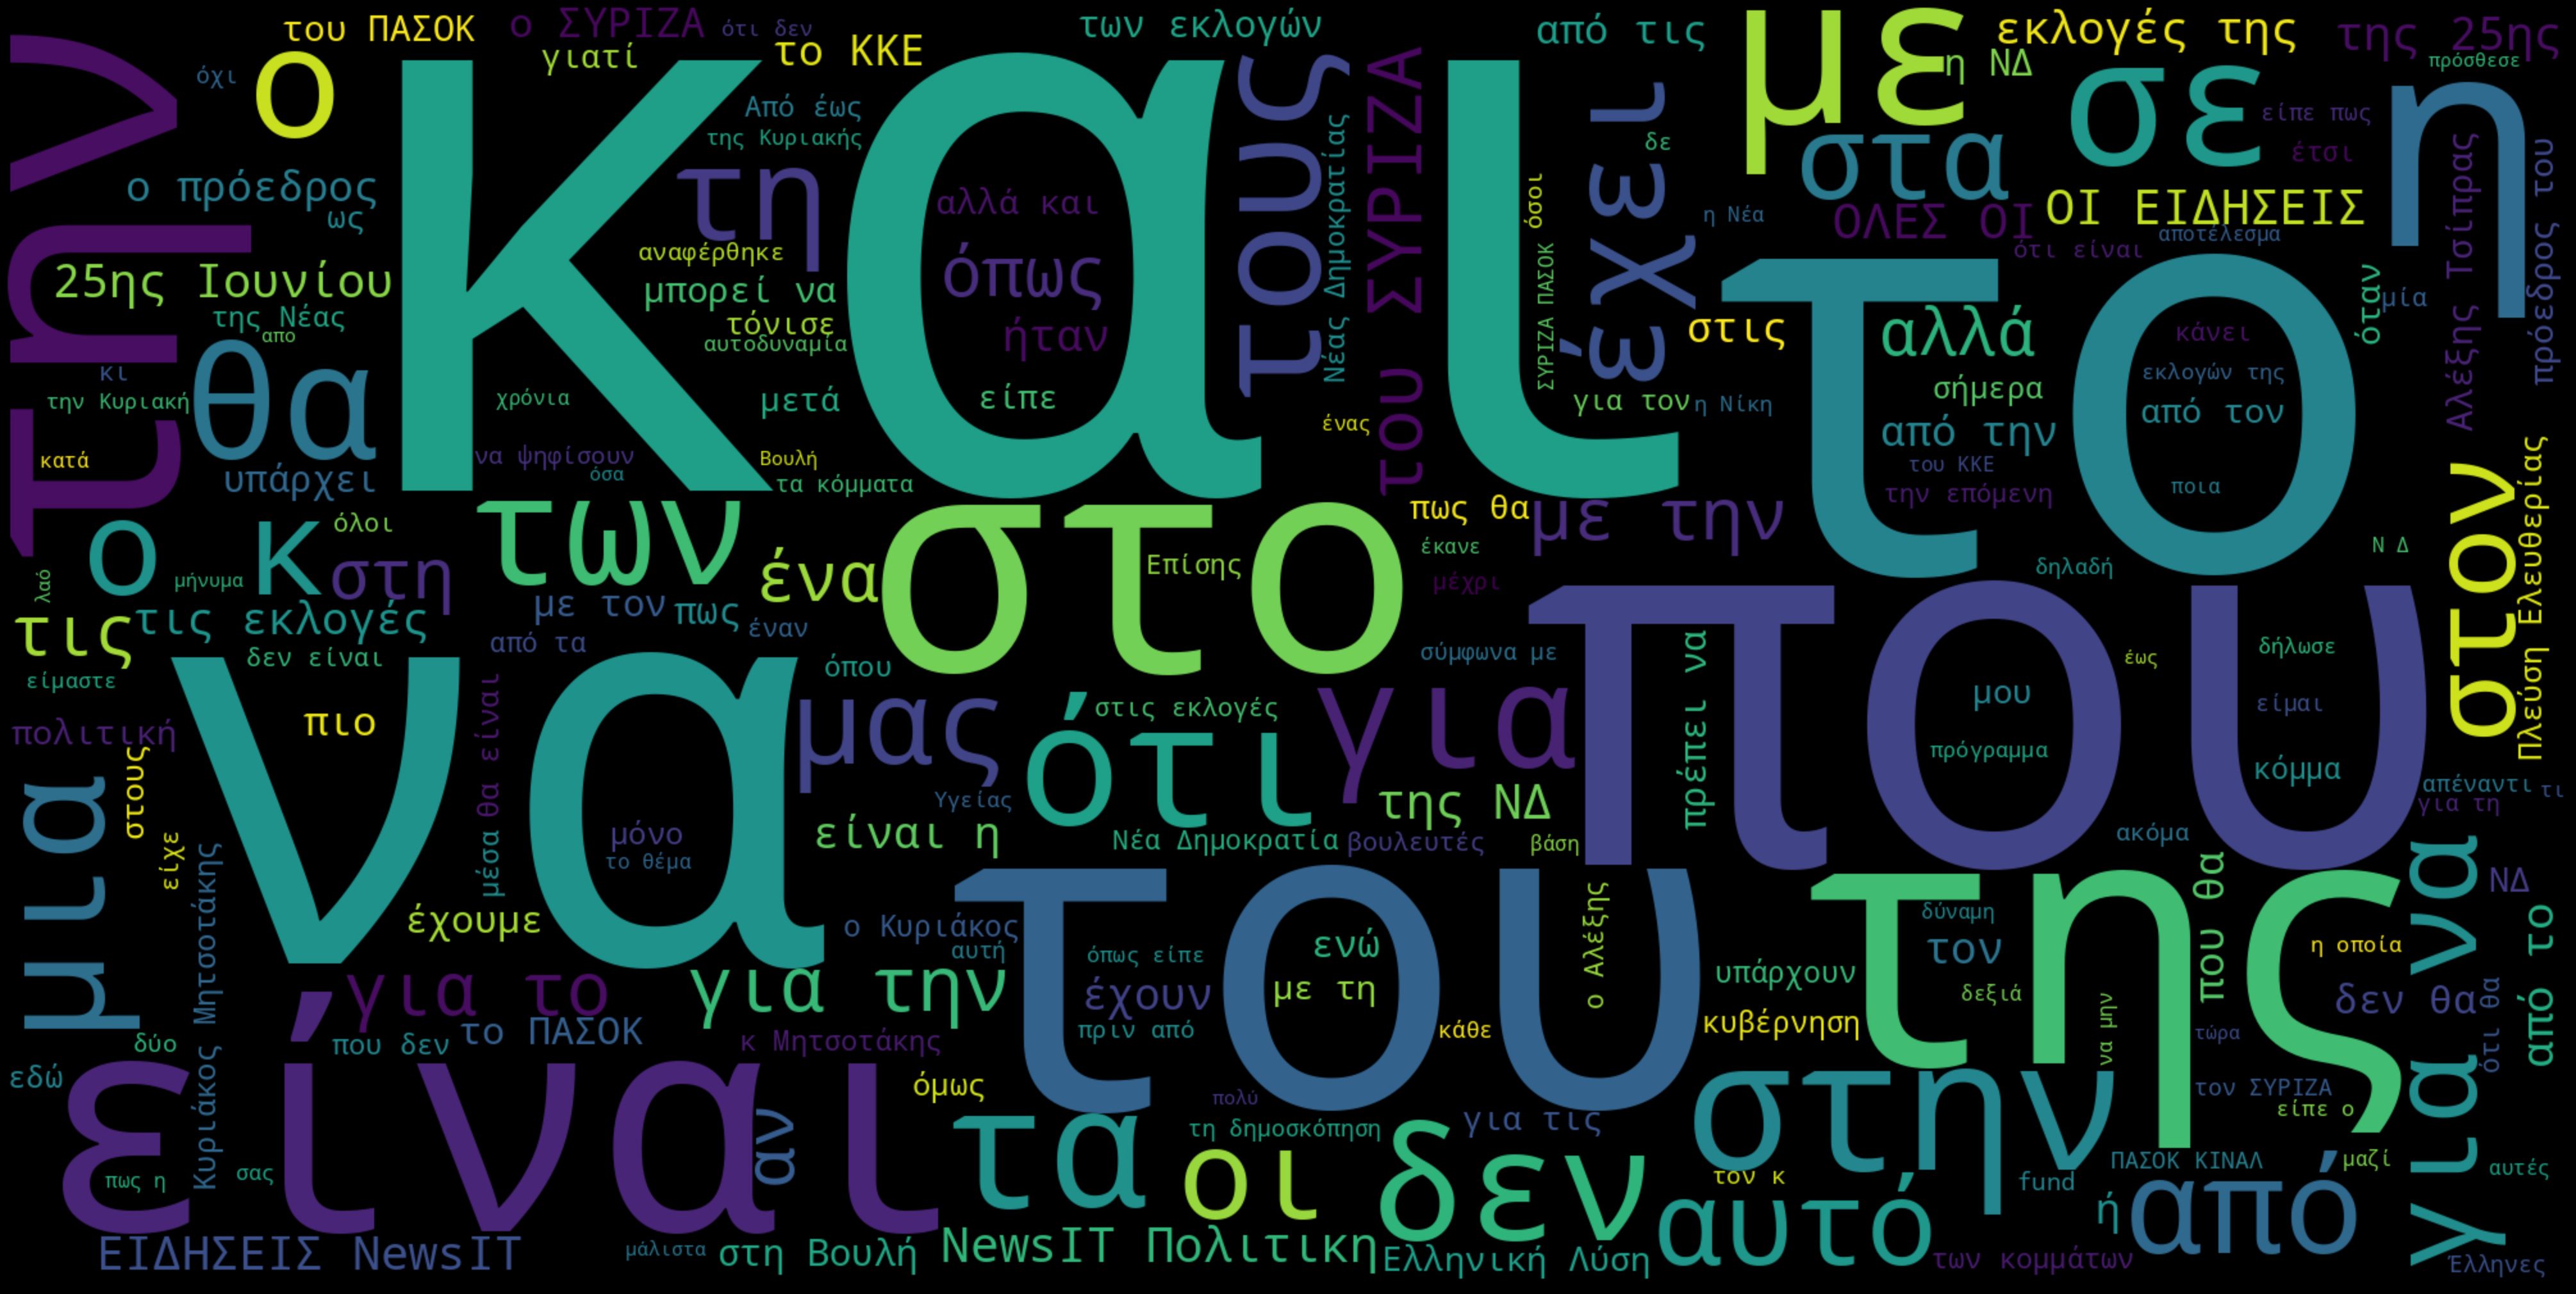

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['στων',
 'πολλούς',
 'κάμποσου',
 'τόσου',
 'έξαφνα',
 'ετούτο',
 'αυτού',
 'οτιδήποτε',
 'έκαστον',
 'επομένως',
 'ώσπου',
 'προς',
 'απέναντι',
 'εγώ',
 'εάν',
 'ιδίως',
 'μπορούν',
 'όλων',
 'κάποιαν',
 'ότου']

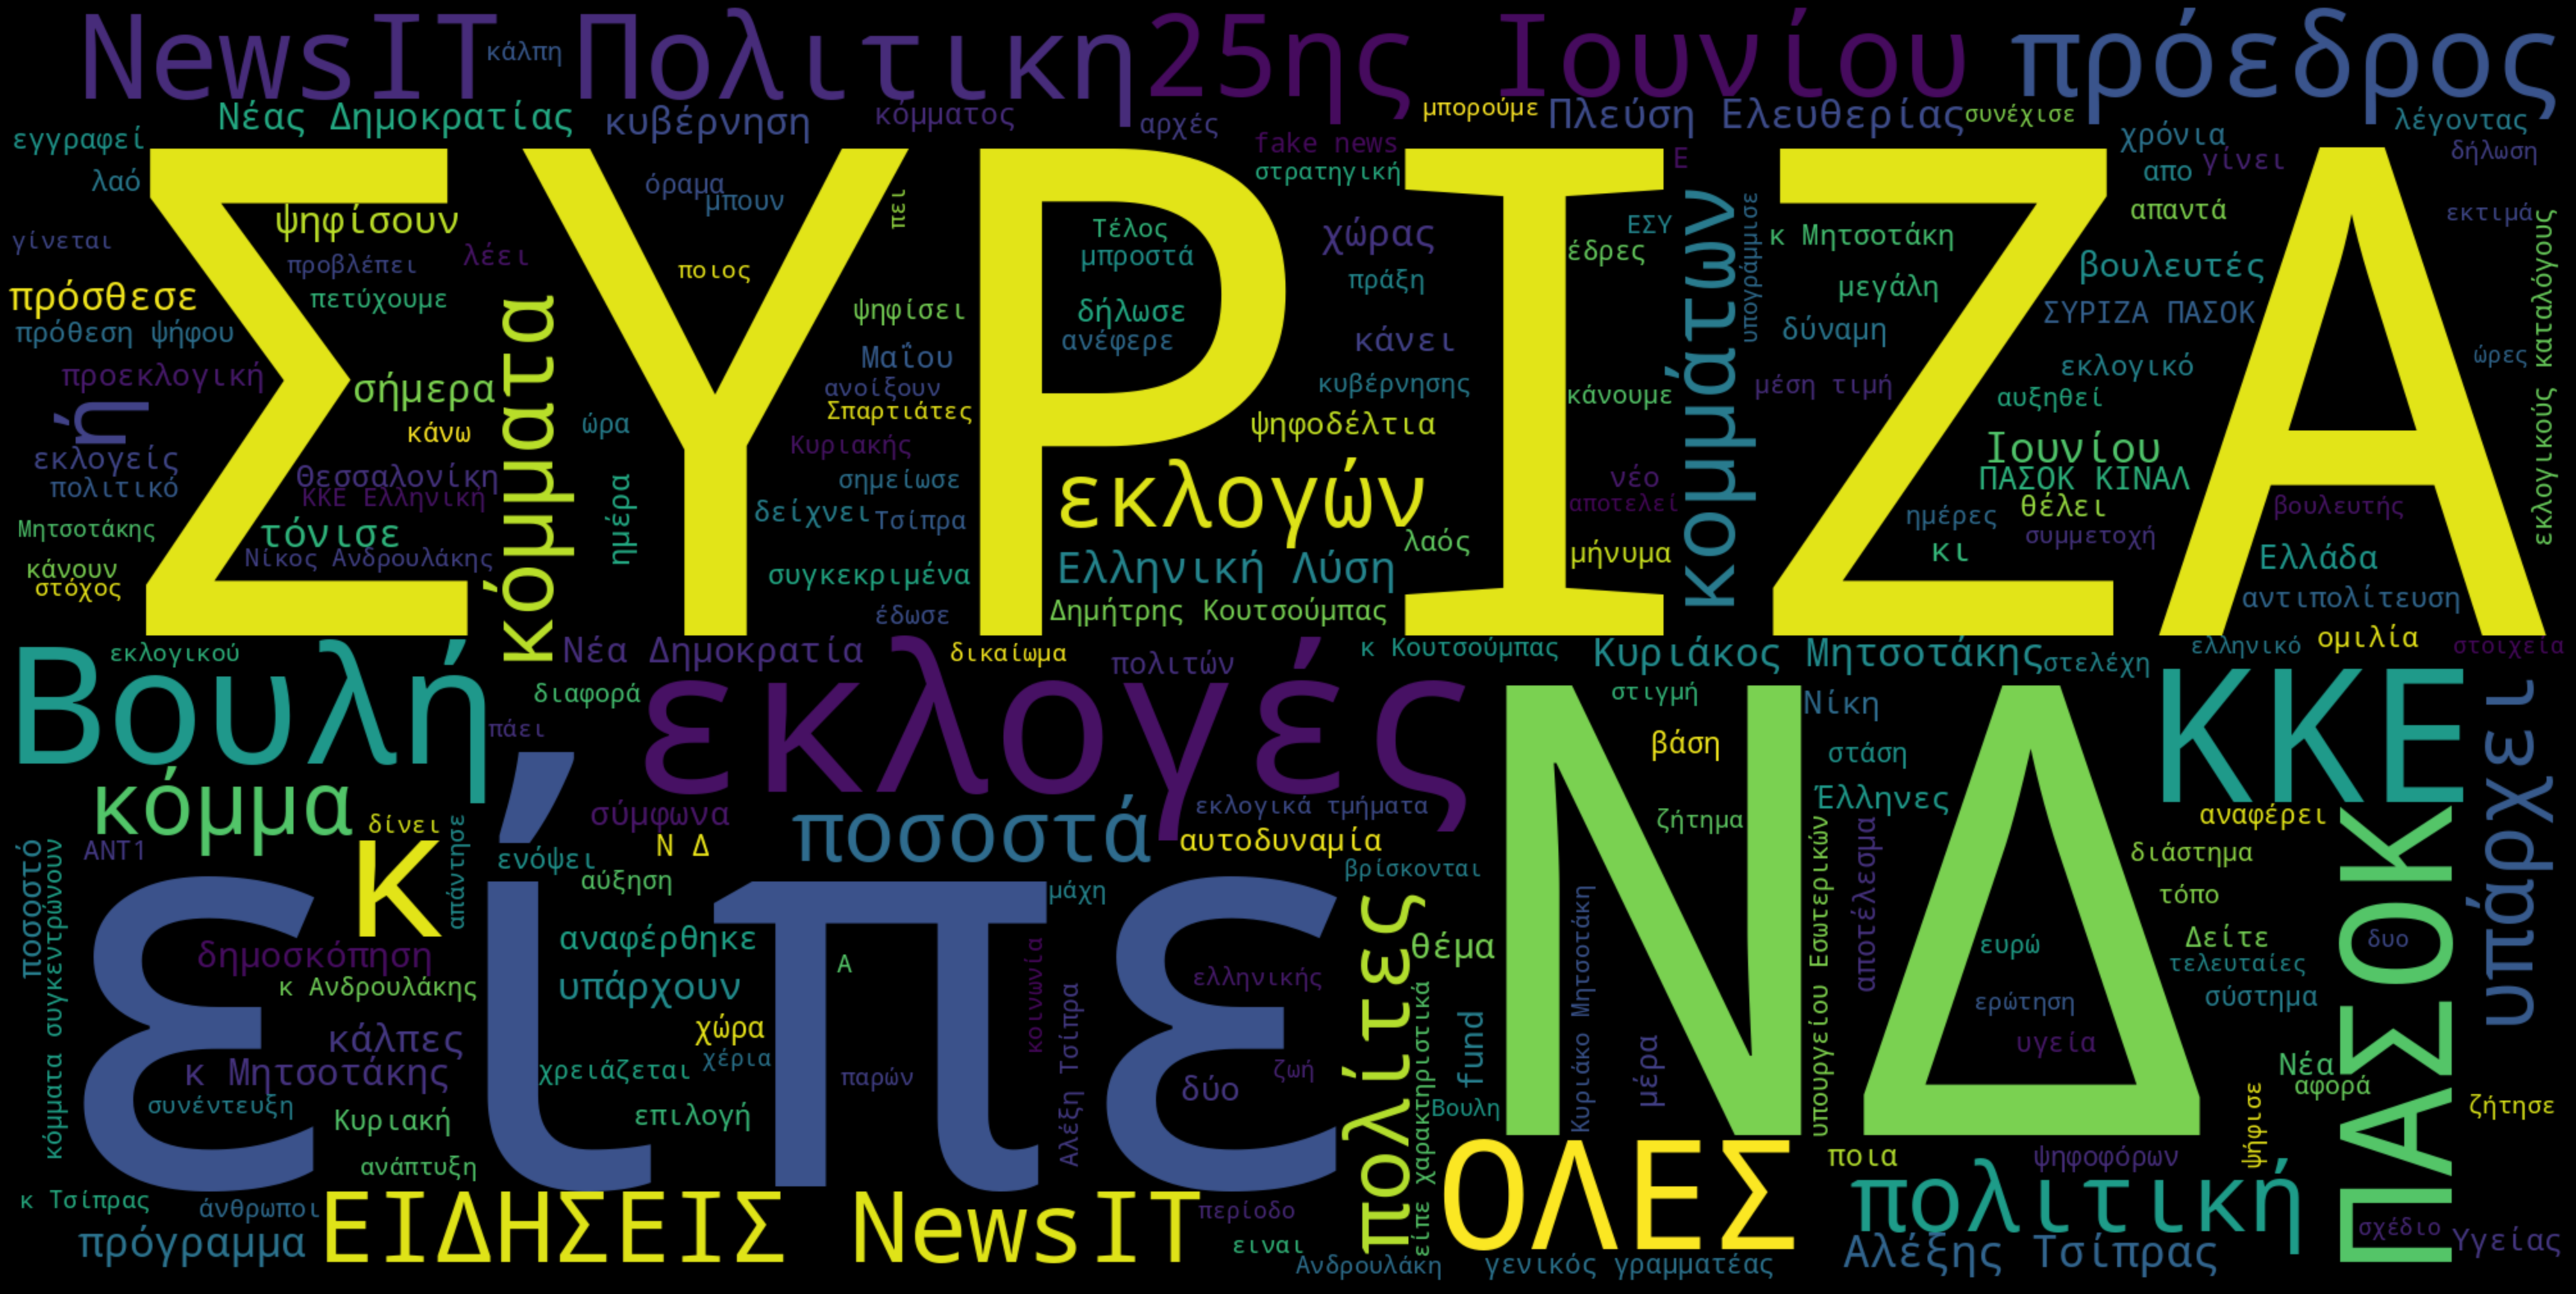

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc = nlp(short_newsit_df['full_text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

NewsIT NewsIT
Πολιτικη Πολιτικη
Μεγαλο μεγαλο
στοιχημα στοιχημα
η ο
αναμορφωση αναμορφωση
του ο
ΕΣΥ ΕΣΥ
- -
Προσωπικος Προσωπικος
γιατρος γιατρος
, ,
προσληψεις προσληψεις
και και
ΕΚΑΒ ΕΚΑΒ
στις σε ο
προτεραιοτητες προτεραιοτητης
του ο
υπουργειου υπουργειος
Υγειας Υγειας
Ο ο
προσωπικός προσωπικός
γιατρός γιατρός
, ,
τα ο
δωρεάν δωρεάν
προγράμματα πρόγραμμα
προληπτικών προληπτικός
εξετάσεων εξετάσεων
, ,
οι ο
προσλήψεις προσλήψεις
, ,
το ο
ΕΚΑΒ ΕΚΑΒ
και και
η ο
κάλυψη κάλυψη
των ο
αναγκών αναγκός
είναι είμαι
μερικές μερικοί
από από
τις ο
προτεραιότητες προτεραιότητα
που που
έχει έχω
θέσει θέτω
το ο
υπουργείο υπουργείο
Υγείας υγεία
για για
την ο
επόμενη επόμενος
τετραετία τετραετία
, ,
με με
τον ο
υπουργό υπουργός
Μιχάλη Μιχάλη
Χρυσοχοΐδη Χρυσοχοΐδη
να να
χρησιμοποιεί χρησιμοποιώ
τη ο
φράση-κλειδί φράση-κλειδί
: :
« «
Επαναθεμελίωση επαναθεμελίωση
του ο
ΕΣΥ ΕΣΥ
» »
. .
« «
Πολλά Πολλά
και και
κρίσιμα κρίσιμα
παραμένουν παραμένω
ανεπίλυτα ανεπίλυτα
και και
ταλαιπωρούν ταλαιπωρώ
τη ο
ζωή ζ

In [ ]:
' '.join(token.lemma_ for token in doc)

'NewsIT Πολιτικη μεγαλο στοιχημα ο αναμορφωση ο ΕΣΥ - Προσωπικος γιατρος , προσληψεις και ΕΚΑΒ σε ο προτεραιοτητης ο υπουργειος Υγειας ο προσωπικός γιατρός , ο δωρεάν πρόγραμμα προληπτικός εξετάσεων , ο προσλήψεις , ο ΕΚΑΒ και ο κάλυψη ο αναγκός είμαι μερικοί από ο προτεραιότητα που έχω θέτω ο υπουργείο υγεία για ο επόμενος τετραετία , με ο υπουργός Μιχάλη Χρυσοχοΐδη να χρησιμοποιώ ο φράση-κλειδί : « επαναθεμελίωση ο ΕΣΥ » . « Πολλά και κρίσιμα παραμένω ανεπίλυτα και ταλαιπωρώ ο ζωή ο πολίτης , ιδιαίτερα ο πιο ευάλωτος » , δηλώνω ο κ. Χρυσοχοΐδης σε ο τελετός παράδοσης-παραλαβής ο υπουργείο υγεία . Γι’ αυτός και ο αναμόρφωση ο ΕΣΥ αποτελώ ίσως ο μεγάλος προσωπικό στοίχημα και για ο ίδιος ο πρωθυπουργός Κυριάκος μητσοτάκης .   στόχος να εξασφαλισθεί πραγματικός ισότητα σε ο πρόσβαση ο πολίτης σε ο δημόσιος σύστημα υγεία και ο κοινωνικός δομή . Ζητούμενο είμαι ο ισότιμος και δωρεάν πρόσβαση όλος ο πολίτης είτε έχω είτε δεν έχω ο οικονομικός δυνατότητα σε ποιοτικός υπηρεσία υγεία . ο μετα

In [ ]:
text

'NewsIT Πολιτικη Ζωη Κωνσταντοπουλου απο Λαρισα: Ειναι η ευκαιρια να δωσουμε ζωη στη βουλη Στο Αρχαίο Θέατρο επέλεξε να συζητήσει με τις πολίτες της Λάρισας η πρόεδρος της «Πλεύσης Ελευθερίας», Ζωή Κωνσταντοπούλου, προερχόμενη από τη Λαμία, δύο ημέρες πριν από τις εκλογές της 25ης Ιουνίου 2023. Η Ζωή Κωνσταντοπούλου αφού παρουσίασε τους υποψήφιους βουλευτές Λάρισας είπε μεταξύ άλλων ότι στόχος του κόμματος της είναι η συμμετοχή των πολιτών μέσα στην βουλή σημειώνοντας πως στην επόμενη βουλή με την είσοδο της «Πλεύσης Ελευθερίας, θα επιδιώκεται να γίνεται σωστά ο κοινοβουλευτικός έλεγχος, αλλά και να έρθει η συζήτηση πάνω στα νομοσχέδια.  «Είναι η στιγμή που θα κριθεί εάν θα αφήσουμε τα επόμενα τέσσερα χρόνια στους ίδιους πολιτικούς, που κάνουν διαγωνισμό ποιος θα πει την καλύτερη ατάκα μέσα στη βουλή και μετά χαριεντίζονται στους διαδρόμους, κοροϊδεύοντας τον ελληνικό λαό . Είναι η ευκαιρία να πάρουμε την ζωή μας στα χέρια μας και να δώσουμε ζωή στη βουλή, που σημαίνει πως να φέρουμε τ

In [ ]:
full_doc = nlp(text)


In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

'αντοπούλου , προερχόμενος από ο Λαμία , δύο ημέρα πριν από ο εκλογή ο 25ος Ιούνιος 2023 . ο Ζωή Κωνσταντοπούλου αφού παρουσιάζω ο υποψήφιος βουλευτής Λάρισας λέγω μεταξύ άλλος ότι στόχος ο κόμμα μου ε'

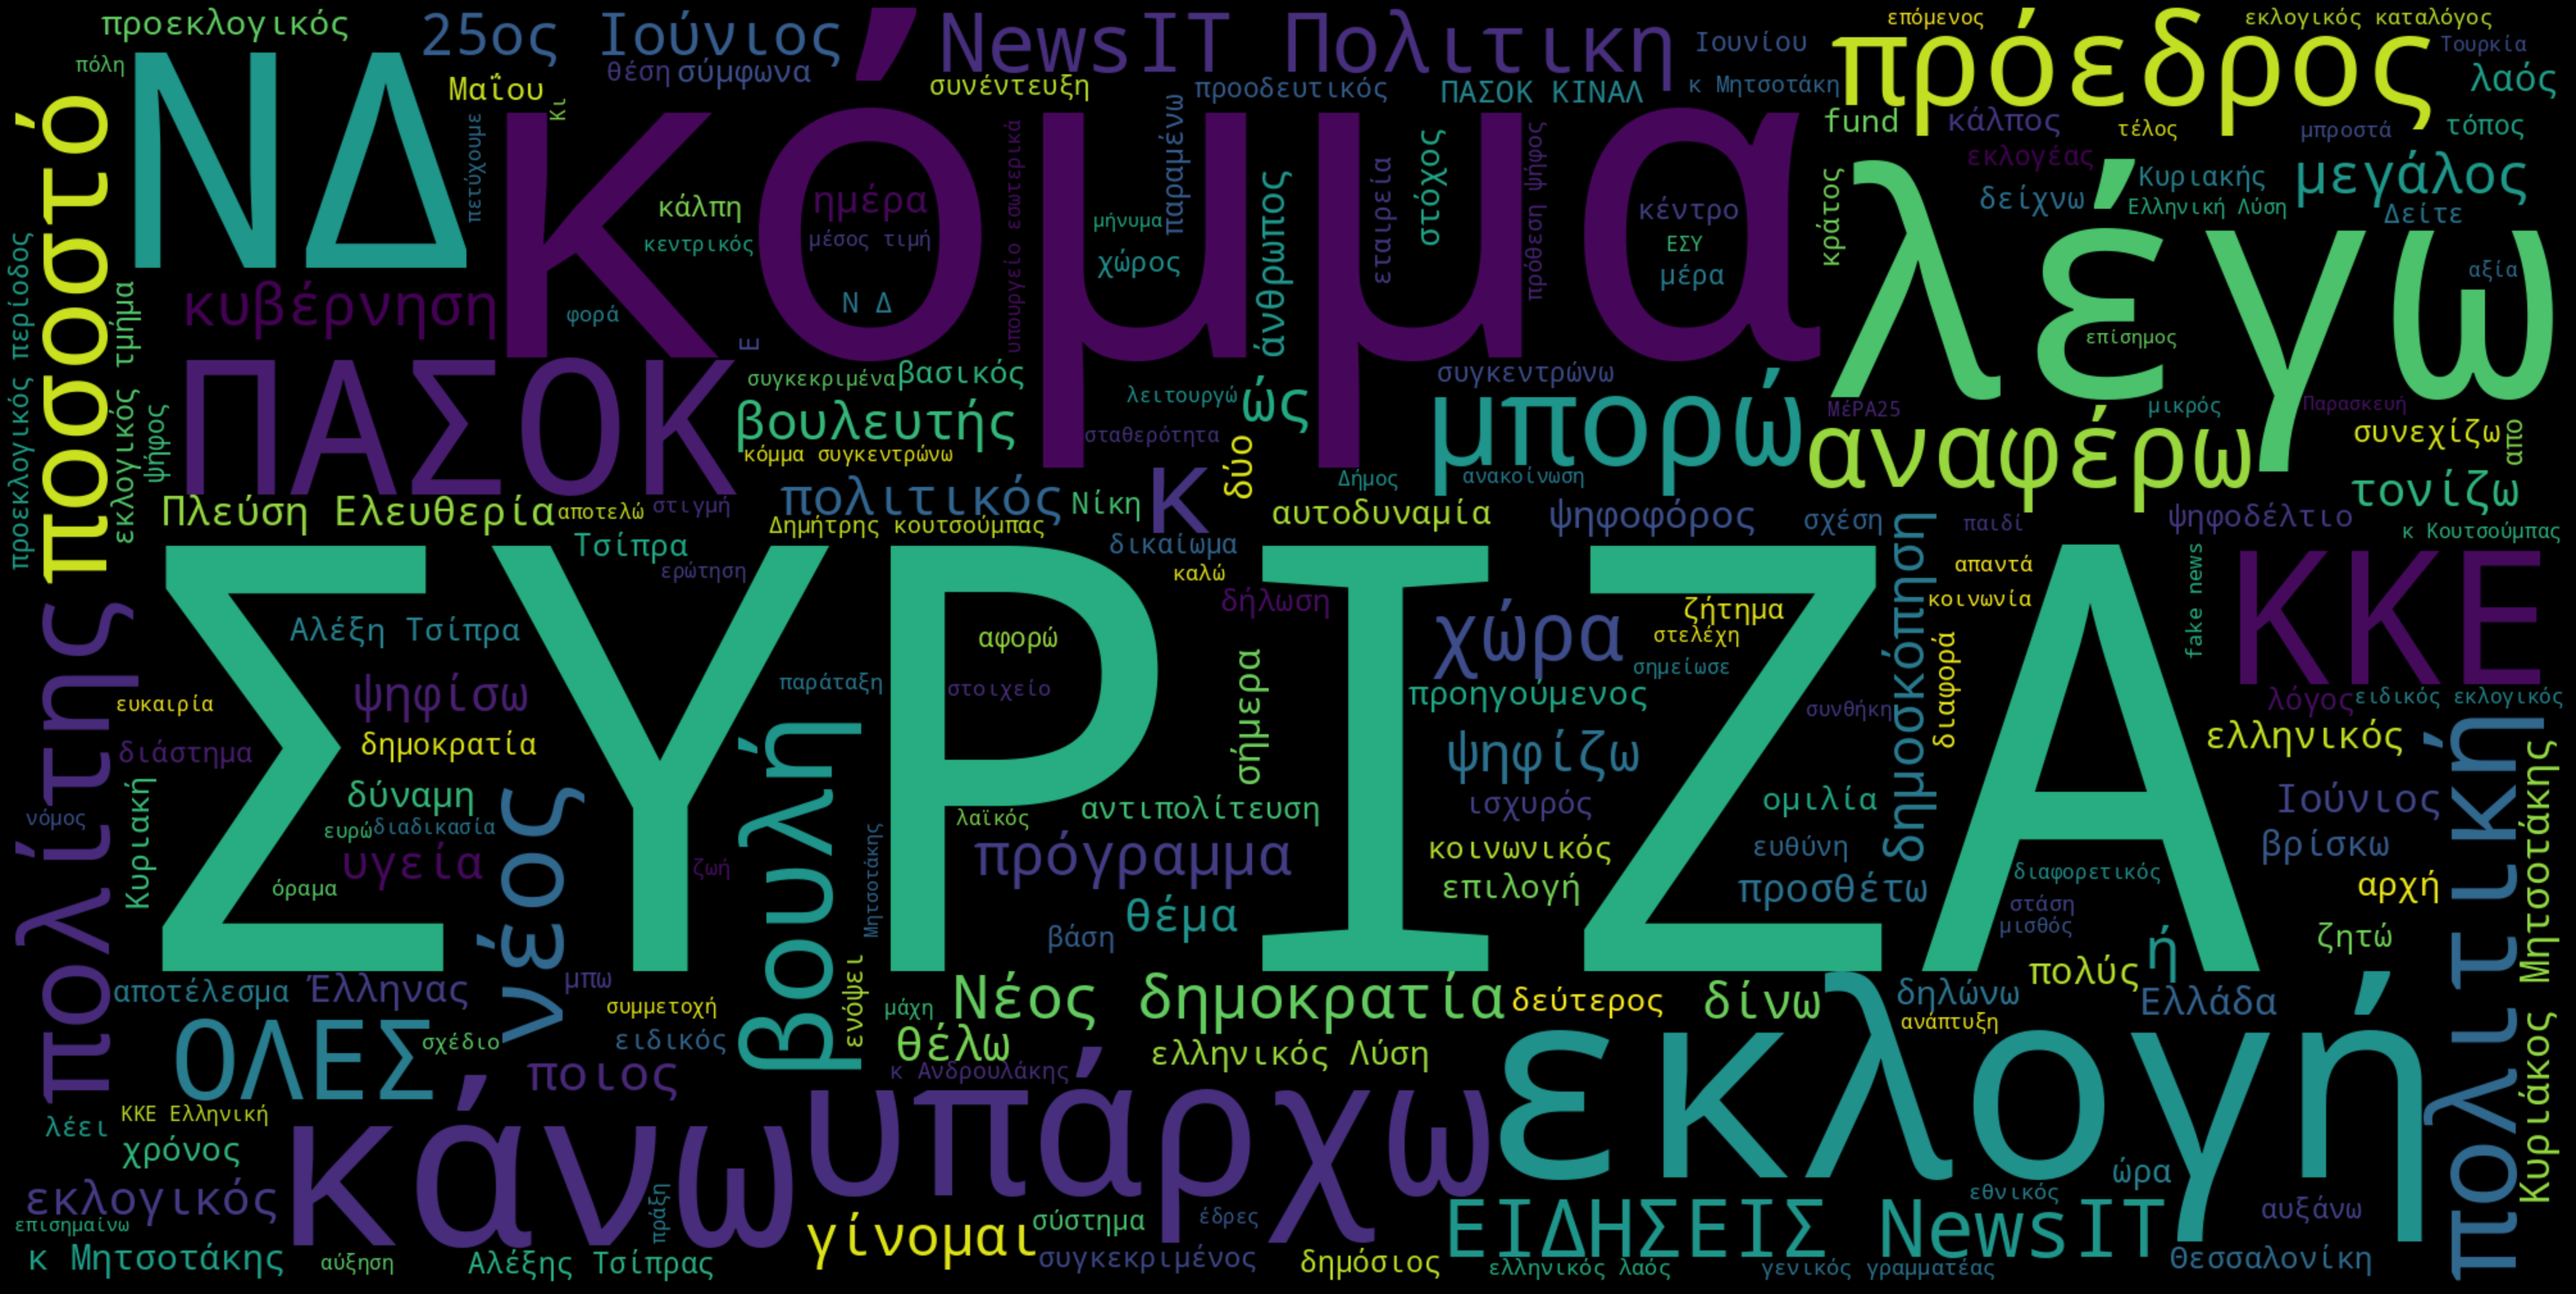

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:

#GRAFHMATA

<Axes: >

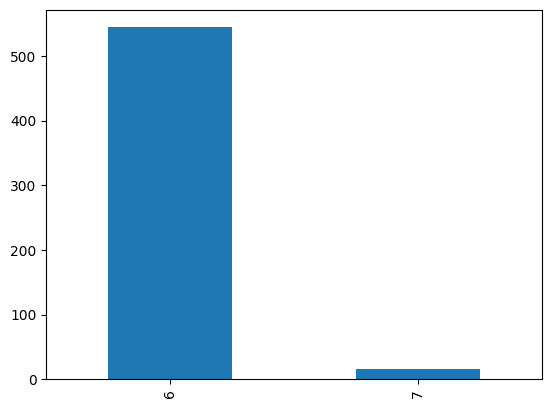

In [ ]:

short_newsit_df['month'].value_counts().plot(kind='bar')

<Axes: >

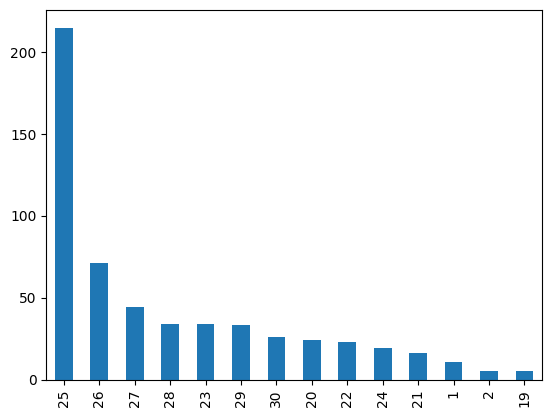

In [ ]:
short_newsit_df['day'].value_counts().plot(kind='bar')

<Axes: >

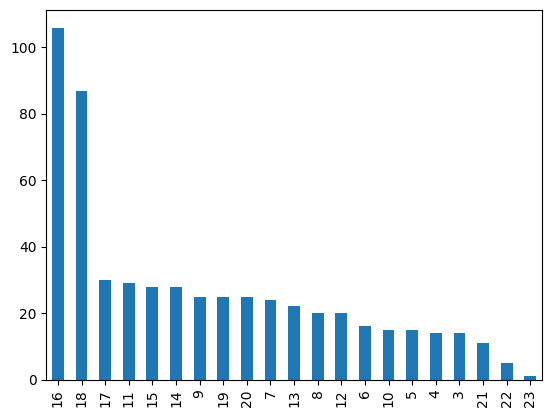

In [ ]:
short_newsit_df['hour'].value_counts().plot(kind='bar')

In [ ]:
#Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [ ]:
count_vector.shape

(560, 18437)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  007  008  01  016  02  03  032  05  ...  ύψος  ύψους  ύψωσε  \
0   0    0    0    0   0    0   0   0    0   0  ...     0      0      0   
1   0    1    0    0   0    0   0   0    0   0  ...     0      0      0   
2   1    0    0    0   0    0   0   0    0   0  ...     0      0      0   
3   1    0    0    0   0    0   0   0    0   0  ...     0      0      0   
4   0    0    0    0   0    0   0   0    0   0  ...     0      0      0   

   ώθηση  ώμους  ώρα  ώρας  ώρες  ώριμη  ώστε  
0      0      0    0     0     0      0     1  
1      0      0    0     0     0      0     4  
2      0      0    0     0     0      0     1  
3      0      0    0     0     0      0     0  
4      0      0    0     0     0      0     0  

[5 rows x 18437 columns]

In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  007  008  01  016  02  03  032  05  ...  ύψιστο  ύψος  ύψους  \
0   0    0    0    0   0    0   0   0    0   0  ...       0     0      0   
1   0    1    0    0   0    0   0   0    0   0  ...       0     0      0   
2   1    0    0    0   0    0   0   0    0   0  ...       0     0      0   
3   1    0    0    0   0    0   0   0    0   0  ...       0     0      0   
4   0    0    0    0   0    0   0   0    0   0  ...       0     0      0   

   ύψωσε  ώθηση  ώμους  ώρα  ώρας  ώρες  ώριμη  
0      0      0      0    0     0     0      0  
1      0      0      0    0     0     0      0  
2      0      0      0    0     0     0      0  
3      0      0      0    0     0     0      0  
4      0      0      0    0     0     0      0  

[5 rows x 18011 columns]

In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  050  06  07  08  10  100  11  12  ...  όρια  όριο  όρκο  όρος  \
0   0    0    0   0   0   0   0    0   0   1  ...     0     0     0     0   
1   0    1    0   0   0   0   1    0   0   0  ...     0     0     0     0   
2   1    0    0   0   0   0   1    0   1   0  ...     0     0     2     0   
3   1    0    0   0   0   0   0    0   0   1  ...     0     0     0     0   
4   0    0    0   0   0   0   0    0   0   0  ...     0     0     0     0   

   όρους  όψει  ύφος  ώθηση  ώρα  ώρες  
0      0     0     0      0    0     0  
1      0     0     0      0    0     0  
2      0     0     0      0    0     0  
3      0     0     0      0    0     0  
4      0     0     0      0    0     0  

[5 rows x 2379 columns]

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

2023  25ης  live  newsit  αποτελέσματα  βουλευτές  δείτε  ειδησεις  \
0     0     0     0       1             0          0      0         1   
1     0     0     0       1             0          0      0         1   
2     2     1     0       1             0          8      0         1   
3     3     2     0       1             0          0      0         1   
4     0     0     0       1             0          0      0         1   

   εκλογές  εκλογών  ιουνίου  λεπτό  νέα  νδ  νομού  ολες  περιφέρεια  \
0        0        0        0      0    0   0      0     1           0   
1        0        0        0      0    1   0      0     1           0   
2        1        0        1      0    1   3      0     1           0   
3        9        0        5      0    1   0      0     1           0   
4        0        0        0      0    0   0      0     1           0   

   πολίτες  πολιτικη  συριζα  
0        0         2       5  
1        2         1       0  
2        0         1       1  
3        0         1      17  
4        0         1       0

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

2023 δείτε  21ης μαΐου  25ης ιουνίου  live αποτελέσματα  newsit πολιτικη  \
0           0           0             0                  0                1   
1           0           0             0                  0                1   
2           0           0             1                  0                1   
3           0           0             2                  0                1   
4           0           0             0                  0                1   

   αλέξη τσίπρα  αλέξης τσίπρας  αποτελέσματα εκλογών  αποτελέσματα νομού  \
0             1               0                     0                   0   
1             0               0                     0                   0   
2             0               0                     0                   0   
3             6               3                     0                   0   
4             0               0                     0                   0   

   δείτε live  ειδική εφαρμογή  εκλογές 2023  εκλογές 25ης  \
0           0                0             0             0   
1           0                0             0             0   
2           0                0             0             1   
3           0                0             0             1   
4           0                0             0             0   

   εφαρμογή υπουργείου  ιουνίου 2023  κυριάκος μητσοτάκης  λεπτό λεπτό  \
0                    0             0                    0            0   
1                    0             0                    0            0   
2                    0             0                    2            0   
3                    0             2                    0            0   
4                    0             0                    0            0   

   ολες ειδησεις  περιφέρεια νομού  υπουργείου εσωτερικών  
0              1                 0                      0  
1              1                 0                      0  
2              1                 0                      0  
3              1                 0                      0  
4              1                 0                      0

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

newsit πολιτικη          560
ολες ειδησεις            560
25ης ιουνίου             522
εκλογές 25ης             406
ιουνίου 2023             401
περιφέρεια νομού         343
αποτελέσματα εκλογών     316
2023 δείτε               295
εκλογές 2023             240
δείτε live               238
live αποτελέσματα        236
κυριάκος μητσοτάκης      220
υπουργείου εσωτερικών    206
αλέξης τσίπρας           200
αποτελέσματα νομού       196
λεπτό λεπτό              178
εφαρμογή υπουργείου      177
ειδική εφαρμογή          177
21ης μαΐου               167
αλέξη τσίπρα             160
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

newsit πολιτικη    560
ολες ειδησεις      560
25ης ιουνίου       522
εκλογές 25ης       406
ιουνίου 2023       401
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['καινοτομία', 'άνοδος', 'εξέλιξη', 'οικονομία'])
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

καινοτομία  άνοδος  εξέλιξη  οικονομία
0           0       0        1          0
1           0       0        0          0
2           0       0        0          0
3           0       0        0          0
4           0       0        0          1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_newsit_df['full_text'])

In [ ]:
#Cosine similarity (ομοιότητα κειμένων)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.05414228 0.18374662 0.3940208  0.03734003 0.43856449
  0.21891738 0.03575707 0.3540171  0.03934558 0.03512629 0.05606003
  0.09955892 0.22584279 0.0482587  0.31984918 0.38925625 0.01285747
  0.21774963 0.07604216 0.40942029 0.42693969 0.30942471 0.28857265
  0.21274153 0.12893559 0.37640358 0.17165399 0.13359805 0.21453695
  0.01185279 0.00580399 0.04825788 0.34618138 0.30581298 0.25913035
  0.28730175 0.25891831 0.31002679 0.01765057 0.37213748 0.4210044
  0.45494801 0.27372592 0.23498903 0.01608626 0.03353594 0.1196565
  0.43827529 0.06661098 0.35154792 0.0099442  0.15633797 0.16136247
  0.3571941  0.19049741 0.37156627 0.36934862 0.26877854 0.26120025
  0.261983   0.22324288 0.32782838 0.28031777 0.34812313 0.04587191
  0.35029734 0.40629645 0.36676849 0.03395283 0.03983306 0.02577214
  0.15400986 0.32066482 0.13717708 0.01234617 0.19847247 0.03438872
  0.04952442 0.11617256 0.22944375 0.07711207 0.0417978  0.06766658
  0.30183041 0.05835998 0.05473

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

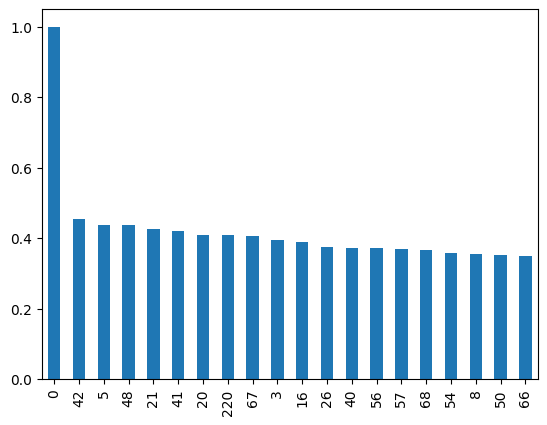

In [ ]:
#ποια άρθρα μοιάζουν περισσότερο με το πρώτο
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_newsit_df['full_text'].loc[0]

'NewsIT Πολιτικη Ημερα αποφασεων στον ΣΥΡΙΖΑ - Συνεδριαζει η Πολιτικη Γραμματεια μετα την παραιτηση Τσιπρα Συνεδριάζει η Πολιτική Γραμματεία του ΣΥΡΙΖΑ, κατά τη διάρκεια της οποίας αναμένεται να οριστικοποιηθεί το χρονοδιάγραμμα για την ανάδειξη νέου προέδρου, μετά την παραίτηση του Αλέξη Τσίπρα. Σε εξέλιξη βρίσκεται η κρίσιμη συνεδρίαση της Πολιτικής Γραμματείας του ΣΥΡΙΖΑ ΠΣ στο πλαίσιο των κομματικών διεργασιών που δρομολογήθηκαν για την εκλογή νέας ηγεσίας.  Το όργανο καλείται να λάβει αποφάσεις σχετικά με το χρονοδιάγραμμα της εκλογής νέου προέδρου και της διεξαγωγής συνεδρίου και τον χαρακτήρα του, επί των οποίων υπάρχουν διαφορετικές προτάσεις από τις διάφορες εσωκομματικές πλευρές. Παράλληλα, ζήτημα που επίσης επείγει για τον ΣΥΡΙΖΑ είναι και εκείνο που αφορά στο ποιος θα αναλάβει μεταβατικά επικεφαλής της ΚΟ, ώστε το κόμμα να εκπροσωπείται στη Βουλή, αρχής γενομένης από την επικείμενη συζήτηση επί των προγραμματικών δηλώσεων.  Υπενθυμίζουμε ότι, χθες, έγινε γνωστό ότι η Όλγα Γ

In [ ]:
short_newsit_df['full_text'].loc[42]  #βαζουμε αυτό που βγαίνει πως μοιάζει περισσότερο

'NewsIT Πολιτικη Γιατι «παραμερισε» ο Αλεξης Τσιπρας - Οι υποψηφιοι διαδοχοι και οι fast track διαδικασιες για να μην μεινει ακεφαλος ο ΣΥΡΙΖΑ Ένας ιστορικός κύκλος έκλεισε σήμερα για τον ΣΥΡΙΖΑ με τον Αλέξη Τσίπρα να επιλέγει, όπως έχει συμβεί πολλές φορές στο πρόσφατο, αλλά και μακρινό παρελθόν από άλλους ηγέτες, το Ζάππειο, έναν εμβληματικό χώρο για να ανακοινώσει την παραίτησή του από την ηγεσία του κόμματος αλλά όχι απαραίτητα την αποχώρησή του από την πολιτική. Ο Αλέξης Τσίπρας από την αρχή της δήλωσής του αποκάλυψε το παρασκήνιο της απόφασής του να μην μείνει στην ηγεσία του ΣΥΡΙΖΑ.  «Έχω πια την εμπειρία αυτές τις αποφάσεις να μην τις λαμβάνω εν θερμώ. Να τις παίρνω στο μαξιλάρι μου και να τις βασανίζω. Να αποφασίζω με ψυχραιμία. Και αυτό έκανα για τρία εικοσιτετράωρα. Γιατί ξέρω καλά ότι οι αποφάσεις μου έχουν επιπτώσεις και σε άλλους ανθρώπους. Ξεπερνούν εκ των πραγμάτων τον δικό μου ατομικό ορίζοντα», είπε. Και έδειξε επίσης σε όσους ισχυρίζονται ότι τον γνωρίζουν καλά ότι θ

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

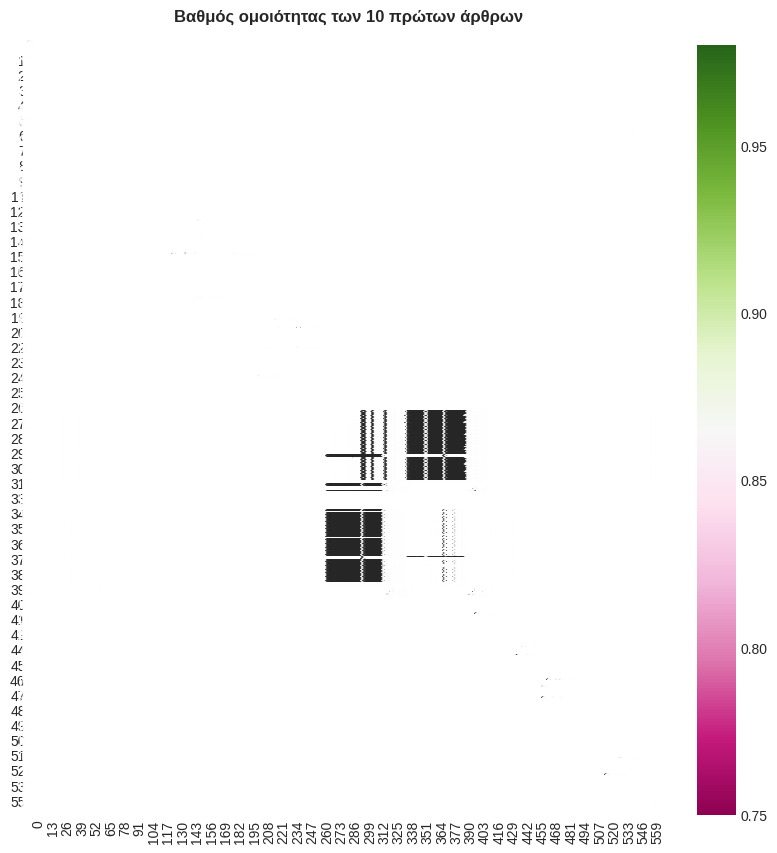

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

In [ ]:
#sentiment anaysis - Τα συναισθήματα των κειμένων

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)  #Αφαιρώ γραμμές με ίδιο περιεχόμενο

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
df = newsit_full_articles_df

In [ ]:
short_newsit_fa_df = newsit_full_articles_df[['date','full_text' ]]
short_newsit_fa_df = short_newsit_fa_df.rename(columns={'full_text': 'text'} )

In [ ]:
short_newsit_fa_df.dtypes

date    datetime64[ns, UTC]
text                 object
dtype: object

In [ ]:
short_newsit_fa_df['date'] = pd.to_datetime(short_newsit_fa_df['date'], format='%Y-%m-%d %H:%M')

In [ ]:
emolex_df['word'].head(3) #vectorizer απο λέξεις συναισθηματικού λεξικού

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_newsit_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    2     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [ ]:
short_newsit_fa_df.head(3)

date                                               text
0 2023-07-02 09:05:05+00:00  NewsIT Πολιτικη Ημερα αποφασεων στον ΣΥΡΙΖΑ - ...
1 2023-07-02 06:55:44+00:00  NewsIT Πολιτικη Μεγαλο στοιχημα η αναμορφωση τ...
2 2023-07-02 06:19:38+00:00  NewsIT Πολιτικη Αυριο ορκιζεται η νεα Βουλη - ...

In [ ]:
short_newsit_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_newsit_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_newsit_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_newsit_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_newsit_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_newsit_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_newsit_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_newsit_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_newsit_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_newsit_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_newsit_fa_df

date  \
0   2023-07-02 09:05:05+00:00   
1   2023-07-02 06:55:44+00:00   
2   2023-07-02 06:19:38+00:00   
3   2023-07-02 06:00:01+00:00   
4   2023-07-02 05:15:29+00:00   
..                        ...   
555 2023-06-19 20:17:03+00:00   
556 2023-06-19 20:06:05+00:00   
557 2023-06-19 19:50:53+00:00   
558 2023-06-19 19:12:17+00:00   
559 2023-06-19 18:07:12+00:00   

                                                  text  anger  positive  joy  \
0    NewsIT Πολιτικη Ημερα αποφασεων στον ΣΥΡΙΖΑ - ...      1         4    1   
1    NewsIT Πολιτικη Μεγαλο στοιχημα η αναμορφωση τ...      6        38   12   
2    NewsIT Πολιτικη Αυριο ορκιζεται η νεα Βουλη - ...      9        38    9   
3    NewsIT Πολιτικη Το αδιεξοδο στον ΣΥΡΙΖΑ μετα τ...      6        20    2   
4    NewsIT Πολιτικη Αδωνις Γεωργιαδης: Ερχεται νομ...      3        13    2   
..                                                 ...    ...       ...  ...   
555  NewsIT Πολιτικη Ανδρουλακης: Να αφησουν τους ε...     24        46   16   
556  NewsIT Πολιτικη Κουτσουμπας: O λαος μπορει να ...     27        52   10   
557  NewsIT Πολιτικη Τα σεναρια για υπουργεια σε πε...      0         4    1   
558  NewsIT Πολιτικη Οι χειραψιες και οι σελφι Μητσ...      2         7    2   
559  NewsIT Πολιτικη Μητσοτακης στο Ionian TV κατα ...     35        92   29   

     disgust  surprise  trust  anticipation  sadness  negative  fear  
0          0         2      1             2        3         4     0  
1          7         5     22            15        8        15     9  
2          3         8     22            18        3        19    10  
3         10         4     16            11        8        17     5  
4          2         3     10             5        3         9     3  
..       ...       ...    ...           ...      ...       ...   ...  
555       21        18     31            19       17        35    21  
556       19         7     34            14       15        47    26  
557        2         0      2             1        0         3     3  
558        2         1      5             1        2         5     2  
559       42        19     66            28       25        84    38  

[560 rows x 12 columns]

In [ ]:
short_newsit_fa_df.reset_index(inplace=True)
short_newsit_fa_df.set_index('date', inplace=True)
short_newsit_fa_df

index  \
date                               
2023-07-02 09:05:05+00:00      0   
2023-07-02 06:55:44+00:00      1   
2023-07-02 06:19:38+00:00      2   
2023-07-02 06:00:01+00:00      3   
2023-07-02 05:15:29+00:00      4   
...                          ...   
2023-06-19 20:17:03+00:00    555   
2023-06-19 20:06:05+00:00    556   
2023-06-19 19:50:53+00:00    557   
2023-06-19 19:12:17+00:00    558   
2023-06-19 18:07:12+00:00    559   

                                                                        text  \
date                                                                           
2023-07-02 09:05:05+00:00  NewsIT Πολιτικη Ημερα αποφασεων στον ΣΥΡΙΖΑ - ...   
2023-07-02 06:55:44+00:00  NewsIT Πολιτικη Μεγαλο στοιχημα η αναμορφωση τ...   
2023-07-02 06:19:38+00:00  NewsIT Πολιτικη Αυριο ορκιζεται η νεα Βουλη - ...   
2023-07-02 06:00:01+00:00  NewsIT Πολιτικη Το αδιεξοδο στον ΣΥΡΙΖΑ μετα τ...   
2023-07-02 05:15:29+00:00  NewsIT Πολιτικη Αδωνις Γεωργιαδης: Ερχεται νομ...   
...                                                                      ...   
2023-06-19 20:17:03+00:00  NewsIT Πολιτικη Ανδρουλακης: Να αφησουν τους ε...   
2023-06-19 20:06:05+00:00  NewsIT Πολιτικη Κουτσουμπας: O λαος μπορει να ...   
2023-06-19 19:50:53+00:00  NewsIT Πολιτικη Τα σεναρια για υπουργεια σε πε...   
2023-06-19 19:12:17+00:00  NewsIT Πολιτικη Οι χειραψιες και οι σελφι Μητσ...   
2023-06-19 18:07:12+00:00  NewsIT Πολιτικη Μητσοτακης στο Ionian TV κατα ...   

                           anger  positive  joy  disgust  surprise  trust  \
date                                                                        
2023-07-02 09:05:05+00:00      1         4    1        0         2      1   
2023-07-02 06:55:44+00:00      6        38   12        7         5     22   
2023-07-02 06:19:38+00:00      9        38    9        3         8     22   
2023-07-02 06:00:01+00:00      6        20    2       10         4     16   
2023-07-02 05:15:29+00:00      3        13    2        2         3     10   
...                          ...       ...  ...      ...       ...    ...   
2023-06-19 20:17:03+00:00     24        46   16       21        18     31   
2023-06-19 20:06:05+00:00     27        52   10       19         7     34   
2023-06-19 19:50:53+00:00      0         4    1        2         0      2   
2023-06-19 19:12:17+00:00      2         7    2        2         1      5   
2023-06-19 18:07:12+00:00     35        92   29       42        19     66   

                           anticipation  sadness  negative  fear  
date                                                              
2023-07-02 09:05:05+00:00             2        3         4     0  
2023-07-02 06:55:44+00:00            15        8        15     9  
2023-07-02 06:19:38+00:00            18        3        19    10  
2023-07-02 06:00:01+00:00            11        8        17     5  
2023-07-02 05:15:29+00:00             5        3         9     3  
...                                 ...      ...       ...   ...  
2023-06-19 20:17:03+00:00            19       17        35    21  
2023-06-19 20:06:05+00:00            14       15        47    26  
2023-06-19 19:50:53+00:00             1        0         3     3  
2023-06-19 19:12:17+00:00             1        2         5     2  
2023-06-19 18:07:12+00:00            28       25        84    38  

[560 rows x 12 columns]

<Axes: xlabel='date'>

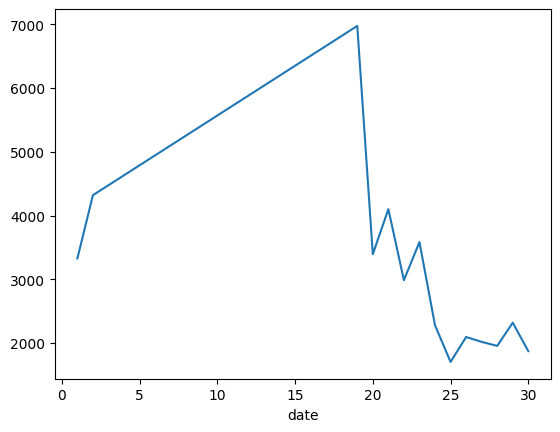

In [ ]:
short_newsit_fa_df['text'].str.len().groupby(by=short_newsit_fa_df.index.day).mean().plot()  #Μετράμε τον μ.ο. του αριθμού των λέξεων ανά ημέρα

<Axes: ylabel='date'>

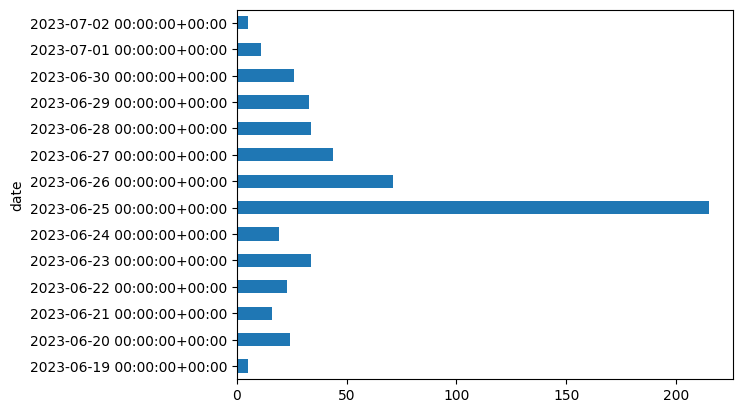

In [ ]:
short_newsit_fa_df['text'].resample('D').count().plot(kind='barh') #πλήθος άρθρων ανά ημέρα

In [ ]:
Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα

<Axes: xlabel='date'>

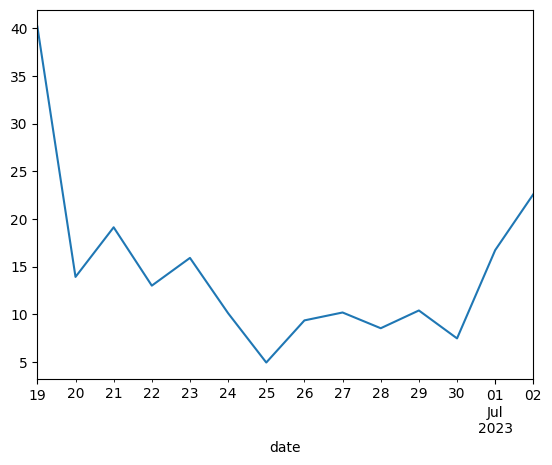

In [ ]:
short_newsit_fa_df['positive'].resample('D').mean().plot()

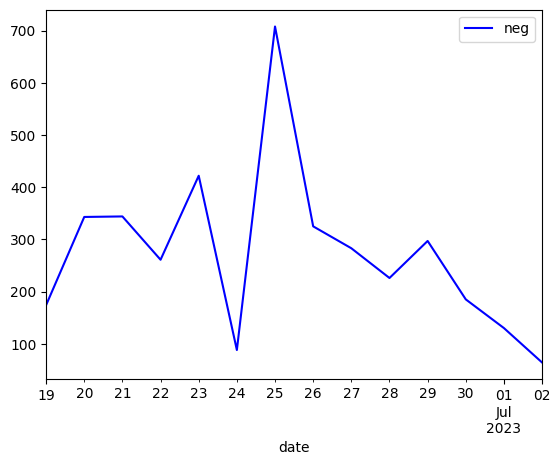

In [ ]:
short_newsit_fa_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

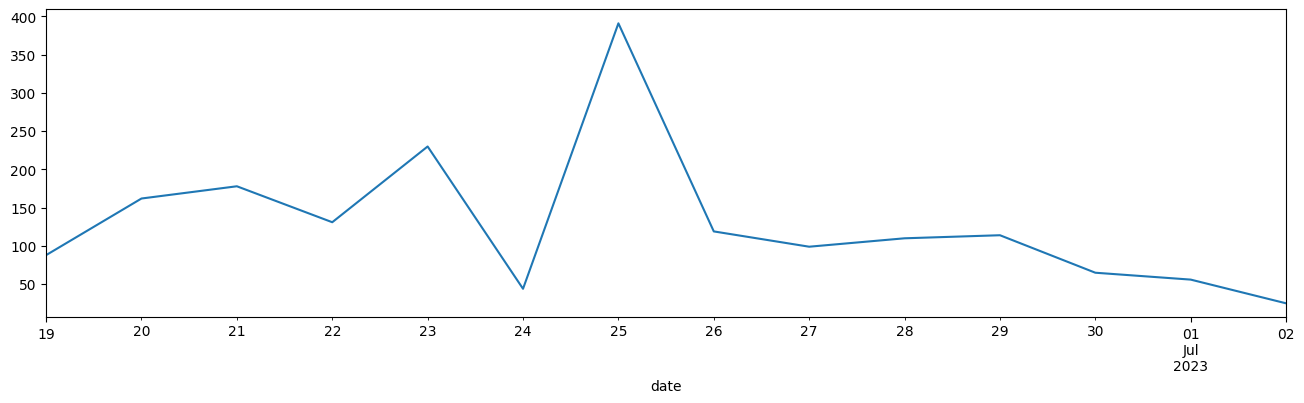

In [ ]:
short_newsit_fa_df['anger'].resample('D').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

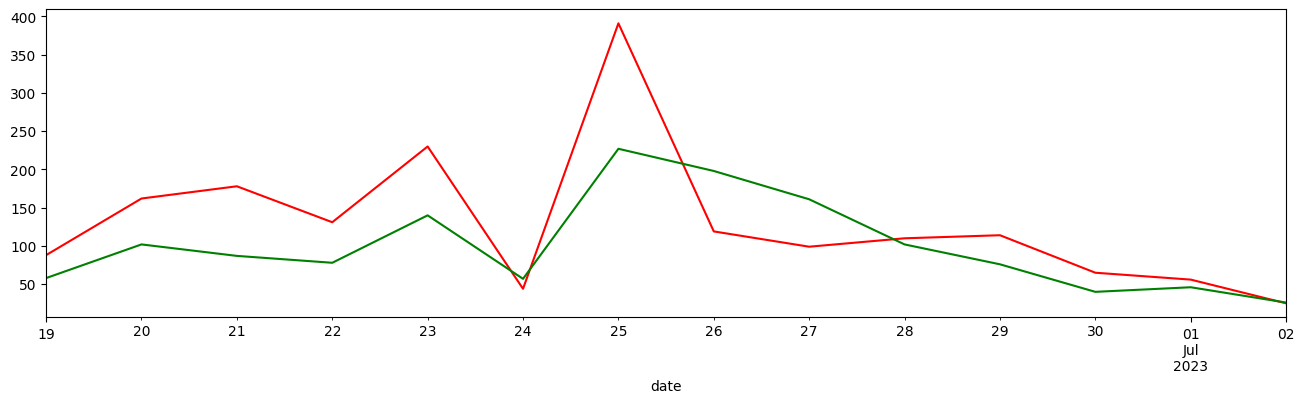

In [ ]:
ax = short_newsit_fa_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_newsit_fa_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

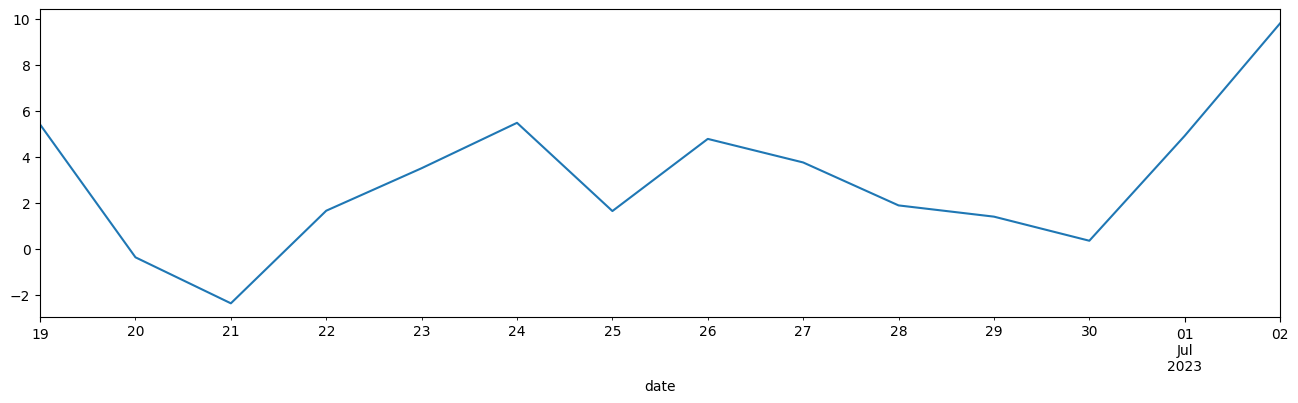

In [ ]:
short_newsit_fa_df['pos/neg'] = short_newsit_fa_df['positive'] - short_newsit_fa_df['negative']
short_newsit_fa_df['pos/neg'].resample('D').mean().plot(figsize=(16,4)) #Ένας τρόπος αξιόπιστης σύγκρισης είναι η σύγκριση των διαφορών π.χ. θετικότητας/αρνητικότητας.
#Οι θετικές τιμές, υπερτερεί η θετικοτητα, οι αρνητικές ,η αρνητικότητα

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

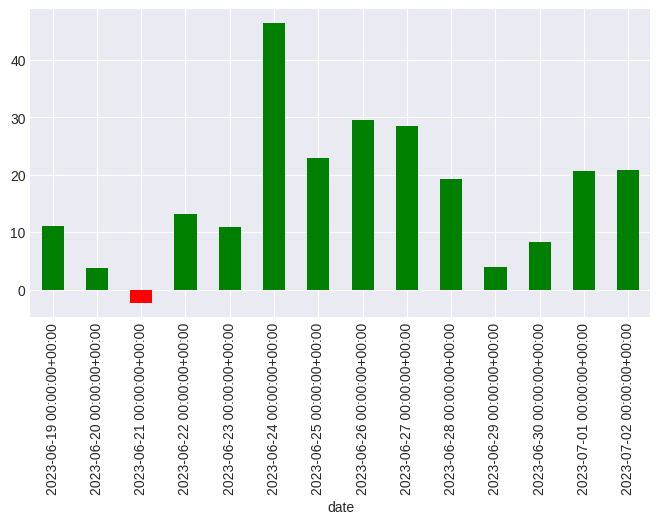

In [ ]:
short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_newsit_fa_df.positive*100//short_newsit_fa_df[['positive','negative']].sum(
        axis=1) - short_newsit_fa_df.negative*100//short_newsit_fa_df[['positive','negative']].sum(axis=1)

short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
short_newsit_fa_df[(short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_newsit_fa_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']] #εντοπίσουμε το άρθρο με τη μεγαλύτερη θετικότητα και το άρθρο με τη μεγαλύτερη αρνητικότητα

index  positive  negative  \
date                                                   
2023-06-30 11:10:19+00:00     30         3         0   
2023-06-29 19:19:58+00:00     43         0         2   
2023-06-29 16:26:51+00:00     49         6         0   
2023-06-28 20:24:25+00:00     76         0         1   
2023-06-28 12:23:47+00:00     91         2         0   
2023-06-28 11:09:42+00:00     93         3         0   
2023-06-27 16:43:31+00:00    113         1         0   
2023-06-27 09:51:13+00:00    141         2         0   
2023-06-26 21:06:38+00:00    153         5         0   
2023-06-26 17:43:37+00:00    156         4         0   
2023-06-26 16:20:57+00:00    161         7         0   
2023-06-26 14:39:36+00:00    178         3         0   
2023-06-26 12:48:45+00:00    189         1         0   
2023-06-26 09:35:04+00:00    199         0         1   
2023-06-26 07:23:24+00:00    207         1         0   
2023-06-26 06:47:02+00:00    209         0         1   
2023-06-26 06:04:41+00:00    211         0         2   
2023-06-26 05:18:55+00:00    214         2         0   
2023-06-25 22:28:51+00:00    228        10         0   
2023-06-25 20:40:05+00:00    238         2         0   
2023-06-25 20:25:01+00:00    241         0         1   
2023-06-25 18:36:56+00:00    261         2         0   
2023-06-25 18:16:00+00:00    264         1         0   
2023-06-25 17:08:43+00:00    334         4         0   
2023-06-25 15:09:35+00:00    411         4         0   
2023-06-25 13:39:56+00:00    414         3         0   
2023-06-25 09:21:55+00:00    422         5         0   
2023-06-25 07:05:10+00:00    434         3         0   
2023-06-25 06:11:36+00:00    437         2         0   
2023-06-24 17:49:51+00:00    443         6         0   
2023-06-24 11:10:00+00:00    452         1         0   
2023-06-23 20:35:21+00:00    460         2         0   
2023-06-23 16:24:07+00:00    474         0         1   
2023-06-22 08:00:14+00:00    511         4         0   
2023-06-21 20:27:33+00:00    516         0         1   
2023-06-20 17:17:50+00:00    534         2         0   

                           (-)αρνητικότητα | θετικότητα(+)  
date                                                        
2023-06-30 11:10:19+00:00                            100.0  
2023-06-29 19:19:58+00:00                           -100.0  
2023-06-29 16:26:51+00:00                            100.0  
2023-06-28 20:24:25+00:00                           -100.0  
2023-06-28 12:23:47+00:00                            100.0  
2023-06-28 11:09:42+00:00                            100.0  
2023-06-27 16:43:31+00:00                            100.0  
2023-06-27 09:51:13+00:00                            100.0  
2023-06-26 21:06:38+00:00                            100.0  
2023-06-26 17:43:37+00:00                            100.0  
2023-06-26 16:20:57+00:00                            100.0  
2023-06-26 14:39:36+00:00                            100.0  
2023-06-26 12:48:45+00:00                            100.0  
2023-06-26 09:35:04+00:00                           -100.0  
2023-06-26 07:23:24+00:00                            100.0  
2023-06-26 06:47:02+00:00                           -100.0  
2023-06-26 06:04:41+00:00                           -100.0  
2023-06-26 05:18:55+00:00                            100.0  
2023-06-25 22:28:51+00:00                            100.0  
2023-06-25 20:40:05+00:00                            100.0  
2023-06-25 20:25:01+00:00                           -100.0  
2023-06-25 18:36:56+00:00                            100.0  
2023-06-25 18:16:00+00:00                            100.0  
2023-06-25 17:08:43+00:00                            100.0  
2023-06-25 15:09:35+00:00                            100.0  
2023-06-25 13:39:56+00:00                            100.0  
2023-06-25 09:21:55+00:00                            100.0  
2023-06-25 07:05:10+00:00                            100.0  
2023-06-25 06:11:36+00:00                            100.0  
2023-06

In [ ]:
newsit_full_articles_df.loc[[228,443,241], ['url','title', 'full_text']]

url  \
228  https://www.newsit.gr/politikh/ekloges-2023-sy...   
443  https://www.newsit.gr/politikh/ypeks-energopoi...   
241  https://www.newsit.gr/politikh/apotelesmata-ek...   

                                                 title  \
228  Εκλογές 2023: Συγχαρητήρια Μπάιντεν και Μακρόν...   
443  ΥΠΕΞ: Ενεργοποιήθηκε η Μονάδα Διαχείρισης Κρίσ...   
241  Αποτελέσματα εκλογών 2023: Οι 9 βουλευτές που ...   

                                             full_text  
228  NewsIT Πολιτικη Συγχαρητηρια Μπαιντεν και Μακρ...  
443  NewsIT Πολιτικη ΥΠΕΞ: Ενεργοποιηθηκε η Μοναδα ...  
241  NewsIT Πολιτικη Οι 9 βουλευτες που χανει το ΠΑ...